<font color="#CC3D3D"><p>
# Feature Engineering

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.    
*- Andrew Ng, Machine Learning and AI via brain simulations -*
<img align="left" src="http://drive.google.com/uc?export=view&id=1DxffnM22lRGsrf1wI28QLgd6YG9yOa3n" width=800 height=600>

<font color="darkgreen"><p>   
#### Scikit-Learn Preprocessor Interface      
① Import the preprocessor   
② Instantiate the preprocessor   
③ Fit the data to the preprocessor: .fit()   
④ Generate the preprocessed data: .transform()   

1. [Missing Data Hadling](#1.-Missing-Data-Hadling)
2. [Categorical Feature Transformation](#2.-Categorical-Feature-Transformation)
3. [Numerical Feature Transformation](#3.-Numerical-Feature-Transformation)
4. [Feature Selection](#4.-Feature-Selection)
5. [Dimensionality Reduction](#5.-Dimensionality-Reduction)
6. [Feature Generation](#6.-Feature-Generation)

In [1]:
import sklearn; sklearn.__version__

'1.1.3'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 30)

**[Allstate Purchase Prediction Challenge](https://www.kaggle.com/c/allstate-purchase-prediction-challenge/data)**
- 고객이 자동차 보험상품을 구매하기까지의 transaction 기록 
- 각 customer ID 별로 quote history 포함
- 각 customer ID 별 마지막 행이 구매 포인트 (record_type=1)

*Variable Descriptions*
- customer_ID
- shopping_pt - Unique identifier for the shopping point of a given customer
- record_type - 0=shopping point, 1=purchase point
- day - Day of the week (0-6, 0=Monday)
- time - Time of day (HH:MM)
- state - State where shopping point occurred
- location - Location ID where shopping point occurred
- group_size - How many people will be covered under the policy (1, 2, 3 or 4)
- homeowner - Whether the customer owns a home or not (0=no, 1=yes)
- car_age - Age of the customer’s car
- car_value - How valuable was the customer’s car when new
- risk_factor - An ordinal assessment of how risky the customer is (1, 2, 3, 4)
- age_oldest - Age of the oldest person in customer's group
- age_youngest - Age of the youngest person in customer’s group
- married_couple - Does the customer group contain a married couple (0=no, 1=yes)
- C_previous - What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
- duration_previous -  how long (in years) the customer was covered by their previous issuer
- A,B,C,D,E,F,G - the coverage options
- cost - cost of the quoted coverage options

In [3]:
data = pd.read_csv('allstate_train.csv')
data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,g,3.0,46,42,1,1.0,2.0,1,0,2,2,1,2,1,630


In [4]:
data.query('customer_ID == 10152724')

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
665243,10152724,1,0,3,13:42,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,0,0,3,3,0,0,2,642
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,e,NaN,20,20,0,1.0,4.0,1,0,2,3,0,2,2,685
665248,10152724,6,1,1,15:14,KY,10204,1,1,1,d,NaN,20,20,0,4.0,4.0,1,0,3,3,0,2,2,681


In [5]:
# 분석의 편의를 위해 사용할 Feature을 범주형과 연속형으로 구분
con = ['group_size','car_age','age_oldest','age_youngest','duration_previous','cost'] #수치형
cat = ['day','homeowner','car_value','risk_factor','married_couple','C_previous','state','shopping_pt'] #범주형
X = data[con+cat]
X.head()

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
0,2,2,46,42,2.0,633,0,0,g,3.0,1,1.0,IN,1
1,2,2,46,42,2.0,630,0,0,g,3.0,1,1.0,IN,2
2,2,2,46,42,2.0,630,0,0,g,3.0,1,1.0,IN,3
3,2,2,46,42,2.0,630,0,0,g,3.0,1,1.0,IN,4
4,2,2,46,42,2.0,630,0,0,g,3.0,1,1.0,IN,5


In [6]:
y = data['record_type']
y

0         0
1         0
2         0
3         0
4         0
         ..
665244    0
665245    0
665246    0
665247    0
665248    1
Name: record_type, Length: 665249, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) 

## 1. Missing Data Hadling

##### Check missing values

In [8]:
print(X_train.isnull().sum(), '\n')
print(X_test.isnull().sum())

group_size                0
car_age                   0
age_oldest                0
age_youngest              0
duration_previous      9318
cost                      0
day                       0
homeowner                 0
car_value              1002
risk_factor          120320
married_couple            0
C_previous             9318
state                   537
shopping_pt               0
dtype: int64 

group_size                0
car_age                   0
age_oldest                0
age_youngest              0
duration_previous      9393
cost                      0
day                       0
homeowner                 0
car_value               961
risk_factor          120098
married_couple            0
C_previous             9393
state                   482
shopping_pt               0
dtype: int64


### Dropping

In [9]:
X_train.shape, X_test.shape

((332624, 14), (332625, 14))

In [10]:
X_train_drop = X_train.dropna(subset=['state','car_value','risk_factor','C_previous','duration_previous'])
X_test_drop = X_test.dropna(subset=['state','car_value','risk_factor','C_previous','duration_previous'])

X_train_drop.shape

(208135, 14)

In [11]:
#결측값이 하나라도 있는 feature를 자동으로 없애고 싶을 때 아래 코드 사용:
#X_train.dropna(subset=X_train.isnull().sum()[X_train.isnull().sum().gt(0)].index.values)

In [12]:
X_train_drop.isnull().sum()

group_size           0
car_age              0
age_oldest           0
age_youngest         0
duration_previous    0
cost                 0
day                  0
homeowner            0
car_value            0
risk_factor          0
married_couple       0
C_previous           0
state                0
shopping_pt          0
dtype: int64

### Imputation

##### Continuous feature의 결측값 대체

In [13]:
print(X_train[con].isnull().sum(), '\n')
print(X_test[con].isnull().sum())

group_size              0
car_age                 0
age_oldest              0
age_youngest            0
duration_previous    9318
cost                    0
dtype: int64 

group_size              0
car_age                 0
age_oldest              0
age_youngest            0
duration_previous    9393
cost                    0
dtype: int64


In [14]:
X_train[X_train['duration_previous'].isna()]['duration_previous']

272391   NaN
214948   NaN
585757   NaN
408639   NaN
396837   NaN
          ..
298367   NaN
538112   NaN
468967   NaN
441898   NaN
101261   NaN
Name: duration_previous, Length: 9318, dtype: float64

*Method-1: Univariate Imputation*

In [15]:
from sklearn.impute import SimpleImputer 

imputer_con = SimpleImputer(strategy="median")
imputer_con.fit(X_train[con]) #수치형 데이터에 중앙값 임퓨터 피팅

SimpleImputer(strategy='median')

- strategy="mean": 평균 대체
- strategy="median": 중위수 대체
- strategy="most_frequent":최빈값 대체

In [16]:
X_train['duration_previous'].median()

5.0

In [17]:
imputer_con.transform(X_train[con])

array([[  1.,   9.,  75.,  75.,  15., 609.],
       [  1.,  13.,  42.,  42.,   0., 661.],
       [  1.,   3.,  52.,  52.,   1., 634.],
       ...,
       [  1.,   9.,  27.,  27.,  10., 678.],
       [  1.,   8.,  30.,  30.,   7., 649.],
       [  1.,   6.,  63.,  63.,  10., 570.]])

In [18]:
X_train_imp = X_train.copy()
X_train_imp[con] = imputer_con.transform(X_train[con])

In [19]:
# 결측값이 중위값으로 바뀐 것 확인 
X_train_imp.loc[X_train[X_train['duration_previous'].isna()].index]['duration_previous']

272391    5.0
214948    5.0
585757    5.0
408639    5.0
396837    5.0
         ... 
298367    5.0
538112    5.0
468967    5.0
441898    5.0
101261    5.0
Name: duration_previous, Length: 9318, dtype: float64

In [20]:
# 테스트 데이터에 imputer 적용
X_test_imp = X_test.copy()
X_test_imp[con] = imputer_con.transform(X_test[con])

print(X_test_imp[con].isnull().sum())
#학습데이터는 피팅과 트랜스폼 다하지만 평가데이터는 트랜스폼만 함 -> 답지를 보는꼴

group_size           0
car_age              0
age_oldest           0
age_youngest         0
duration_previous    0
cost                 0
dtype: int64


*Method-2: Multivariate Imputation* </br>  
*(참고문헌: "데이터가 뛰어노는 AI 놀이터, 캐글", 한빛미디어, 2021)*   
<img align='left' src='http://drive.google.com/uc?export=view&id=1EKe_8kw4vEWdkxduCM7VislSLAxzu6On' width=600 height=400/>

In [21]:
from sklearn.experimental import enable_iterative_imputer  # still experimental 
from sklearn.impute import IterativeImputer

X_train_imp, X_test_imp = X_train.copy(), X_test.copy()

imp = IterativeImputer(max_iter=10)
X_train_imp[con] = imp.fit_transform(X_train[con])
X_test_imp[con] = imp.transform(X_test[con])

In [22]:
X_train_imp.loc[X_train[X_train['duration_previous'].isna()].index]['duration_previous']

272391    3.892071
214948    5.778013
585757    3.959476
408639    3.092878
396837    6.086603
            ...   
298367    5.899791
538112    3.443403
468967    7.571974
441898    8.153841
101261    5.004479
Name: duration_previous, Length: 9318, dtype: float64

##### Categorical feature 의 결측값 대체 -최빈값으로 대체

In [23]:
X_train_imp[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332624 entries, 150823 to 305711
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   day             332624 non-null  int64  
 1   homeowner       332624 non-null  int64  
 2   car_value       331622 non-null  object 
 3   risk_factor     212304 non-null  float64
 4   married_couple  332624 non-null  int64  
 5   C_previous      323306 non-null  float64
 6   state           332087 non-null  object 
 7   shopping_pt     332624 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 30.9+ MB


In [24]:
imp = SimpleImputer(strategy="most_frequent")
X_train_imp[cat] = imp.fit_transform(X_train_imp[cat])
X_test_imp[cat] = imp.transform(X_test_imp[cat])

In [25]:
X_train_imp[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332624 entries, 150823 to 305711
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   day             332624 non-null  object
 1   homeowner       332624 non-null  object
 2   car_value       332624 non-null  object
 3   risk_factor     332624 non-null  object
 4   married_couple  332624 non-null  object
 5   C_previous      332624 non-null  object
 6   state           332624 non-null  object
 7   shopping_pt     332624 non-null  object
dtypes: object(8)
memory usage: 30.9+ MB


In [26]:
print(X_train['car_value'].value_counts())
X_train_imp.loc[X_train[X_train['car_value'].isna()].index]['car_value']

e    109510
f     88546
d     56336
g     49240
h     14436
c     10464
i      1831
b       687
a       572
Name: car_value, dtype: int64


138413    e
286990    e
518512    e
263808    e
606994    e
         ..
545922    e
154908    e
290795    e
604271    e
274278    e
Name: car_value, Length: 1002, dtype: object

<font color='blue'><p>
**기타 다른 결측값 처리 방법:**      
<font color='black'><p>    
- 결측값인 채 처리하기(Ex: -9999 등 쉽게 얻을 수 없는 값 대입)
- 전체 데이터의 평균을 대입하는 대신 범주형 feature로 그룹을 만든 뒤 해당 그룹별 평균을 대입
- 결측값으로 새로운 feature 만들기(Ex: 행 데이터마다 결측값이 있는 feature의 수를 카운팅)

## 2. Categorical Feature Transformation

In [27]:
X_train_imp[cat].head()

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
150823,4,1,f,3.0,1,2.0,WA,7
146112,3,0,f,3.0,0,2.0,WA,3
261430,3,1,e,3.0,0,3.0,OH,6
396128,1,0,d,4.0,0,1.0,NY,11
217607,2,1,d,3.0,0,2.0,MO,7


In [28]:
X_train_imp['car_value']

150823    f
146112    f
261430    e
396128    d
217607    d
         ..
359783    g
152315    e
117952    d
435829    d
305711    e
Name: car_value, Length: 332624, dtype: object

### One-Hot Encoding

##### pd.get_dummies()를 사용하는 방법

In [29]:
# 학습 데이터와 평가 데이터를 결합한 후, get_dummies를 통한 OHE 수행
X_all_imp = pd.concat([X_train_imp, X_test_imp])
X_all_imp_ohe = pd.get_dummies(X_all_imp, columns=cat)
#colums 옵션 -> cat형 컬럼만 겟더미함

In [30]:
X_all_imp_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665249 entries, 150823 to 552504
Data columns (total 83 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   group_size         665249 non-null  float64
 1   car_age            665249 non-null  float64
 2   age_oldest         665249 non-null  float64
 3   age_youngest       665249 non-null  float64
 4   duration_previous  665249 non-null  float64
 5   cost               665249 non-null  float64
 6   day_0              665249 non-null  uint8  
 7   day_1              665249 non-null  uint8  
 8   day_2              665249 non-null  uint8  
 9   day_3              665249 non-null  uint8  
 10  day_4              665249 non-null  uint8  
 11  day_5              665249 non-null  uint8  
 12  day_6              665249 non-null  uint8  
 13  homeowner_0        665249 non-null  uint8  
 14  homeowner_1        665249 non-null  uint8  
 15  car_value_a        665249 non-null  uint8  
 1

In [31]:
X_all_imp_ohe.filter(like='car').head()

,car_age,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
150823,9.0,0,0,0,0,0,1,0,0,0
146112,13.0,0,0,0,0,0,1,0,0,0
261430,3.0,0,0,0,0,1,0,0,0,0
396128,6.0,0,0,0,1,0,0,0,0,0
217607,9.0,0,0,0,1,0,0,0,0,0


In [32]:
# 학습 데이터와 평가 데이터로 재분할
X_train_imp_ohe = X_all_imp_ohe.iloc[:X_train_imp.shape[0],:].reset_index(drop=True)
X_test_imp_ohe = X_all_imp_ohe.iloc[X_train_imp.shape[0]:,:].reset_index(drop=True)

##### OneHotEncoder를 사용하는 방법

In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(X_train_imp[cat]) #[]를 더 감싼 이유는 인자로 2차원 배열을 받기 때문.
print(ohe.categories_)  # enc.get_feature_names() ??

[array([0, 1, 2, 3, 4, 5, 6], dtype=object), array([0, 1], dtype=object), array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], dtype=object), array([1.0, 2.0, 3.0, 4.0], dtype=object), array([0, 1], dtype=object), array([1.0, 2.0, 3.0, 4.0], dtype=object), array(['AL', 'AR', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IN',
       'KS', 'KY', 'MD', 'ME', 'MO', 'MS', 'MT', 'ND', 'NE', 'NH', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SD', 'TN', 'UT', 'WA',
       'WI', 'WV', 'WY'], dtype=object), array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype=object)]


In [34]:
# OHE 결과를 DataFrame 형식으로 만들어 사용할 경우: 

# dummy에 대한 컬럼명 생성 
columns = []
for i, c in enumerate(cat):
    columns += [f'{c}_{v}' for v in ohe.categories_[i]]
# 생성된 dummy를 DataFrame으로 변환 
ohe_train = pd.DataFrame(ohe.transform(X_train_imp[cat]), columns=columns)
ohe_test = pd.DataFrame(ohe.transform(X_test_imp[cat]), columns=columns)
# 인코딩한 feature는 제거하고 나머지 feature와 결합 
X_train_imp_ohe = pd.concat([X_train_imp.drop(columns=cat).reset_index(drop=True), ohe_train], axis=1) # 원래 피처 삭제 후 OHE된 feature 병합
X_test_imp_ohe = pd.concat([X_test_imp.drop(columns=cat).reset_index(drop=True), ohe_test], axis=1) # 원래 피처 삭제 후 OHE된 feature 병합

X_train_imp_ohe

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,day_0,day_1,day_2,day_3,day_4,day_5,day_6,homeowner_0,homeowner_1,...,state_WV,state_WY,shopping_pt_1,shopping_pt_2,shopping_pt_3,shopping_pt_4,shopping_pt_5,shopping_pt_6,shopping_pt_7,shopping_pt_8,shopping_pt_9,shopping_pt_10,shopping_pt_11,shopping_pt_12,shopping_pt_13
0,1.0,9.0,75.0,75.0,15.0,609.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,13.0,42.0,42.0,0.0,661.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,52.0,52.0,1.0,634.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,6.0,43.0,43.0,1.0,687.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,9.0,32.0,32.0,1.0,580.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332619,2.0,6.0,43.0,42.0,1.0,677.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332620,1.0,13.0,65.0,65.0,7.0,627.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
332621,1.0,9.0,27.0,27.0,10.0,678.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332622,1.0,8.0,30.0,30.0,7.0,649.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# OHE 결과를 Array 형식으로 만들어 사용할 경우:  

X_train_imp_ohe = X_train_imp.drop(cat, axis=1) 
X_test_imp_ohe = X_test_imp.drop(cat, axis=1) 
X_train_imp_ohe = np.c_[X_train_imp.drop(cat, axis=1),
                        ohe.transform(X_train_imp[cat])]
X_test_imp_ohe = np.c_[X_test_imp.drop(cat, axis=1),
                        ohe.transform(X_test_imp[cat])]
X_train_imp_ohe

array([[ 1.,  9., 75., ...,  0.,  0.,  0.],
       [ 1., 13., 42., ...,  0.,  0.,  0.],
       [ 1.,  3., 52., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  9., 27., ...,  0.,  0.,  0.],
       [ 1.,  8., 30., ...,  0.,  0.,  0.],
       [ 1.,  6., 63., ...,  0.,  0.,  0.]])

##### pd.get_dummies() vs. OneHotEncoder() 
- 학습데이터와 평가데이터를 구분하지 않고 전체 데이터를 OHE할 경우 => pd.get_dummies()
- 학습데이터와 평가데이터를 구분하여 각각 OHE할 경우 => OneHotEncoder()  
<img align="left" src="https://miro.medium.com/max/720/1*jsz9HJS8TW6DadZKEXOAhA.png" width=600 height=400>
<img align="left" src="https://miro.medium.com/max/720/1*WeFzWwmeAyRqXuBY4h5OLw.png" width=600 height=400>  

In [36]:
!pip install category_encoders

### Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

X_train_imp_le, X_test_imp_le, = X_train_imp.copy(), X_test_imp.copy()

le = LabelEncoder()
for c in cat:
    X_train_imp_le[c] = le.fit_transform(X_train_imp[c])
    X_test_imp_le[c] = le.transform(X_test_imp[c])

In [38]:
###
### 코드 추가: OrdinalEncoder (LabelEncoder 대체)
###

from sklearn.preprocessing import OrdinalEncoder

X_train_imp_le, X_test_imp_le, = X_train_imp.copy(), X_test_imp.copy()

le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, dtype=int)
X_train_imp_le[cat] = le.fit_transform(X_train_imp[cat])
X_test_imp_le[cat] = le.transform(X_test_imp[cat])

X_train_imp_le[cat]

# 경진대회에서는 학습데이터와 평가데이터를 콘캣해서 인코딩하는 방법이 더 좋을떄도있다
# 트리는 라벨인코딩
# 로지스틱 회귀는 원핫 -> 숫자로 라벨링해버리면 순위가 생겨버린다
# 타겟인코딩 -> y값에 가깝게 인코딩하기 때문에 고도의 인코딩기법 but 데이터유출, 과적합 문제 발생 가능성

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
150823,4,1,5,2,1,1,32,6
146112,3,0,5,2,0,1,32,2
261430,3,1,4,2,0,2,24,5
396128,1,0,3,3,0,0,23,10
217607,2,1,3,2,0,1,15,6
...,...,...,...,...,...,...,...,...
359783,4,0,6,2,1,0,0,0
152315,4,0,4,1,0,0,6,8
117952,5,0,3,2,0,2,28,5
435829,4,1,3,3,0,0,27,2


In [39]:
###
### 코드 추가: Target Encoding
###

from category_encoders import TargetEncoder

X_train_imp_te, X_test_imp_te, = X_train_imp.copy(), X_test_imp.copy()
te = TargetEncoder(cols=cat, min_samples_leaf=5, smoothing=50)
# 민 샘플 리프 : 범주의 개수가 5개가 안되면 전체평균하라
X_train_imp_te[cat] = te.fit_transform(X_train_imp[cat], y_train)
X_test_imp_te[cat] = te.transform(X_test_imp[cat])
X_train_imp_te[cat]

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
150823,0.169895,0.149055,0.146432,0.144266,0.147760,0.150376,0.137450,0.328236
146112,0.148013,0.144354,0.146432,0.144266,0.146636,0.150376,0.137450,0.058454
261430,0.148013,0.149055,0.148409,0.144266,0.146636,0.144137,0.148617,0.219065
396128,0.141208,0.144354,0.145289,0.148868,0.146636,0.146600,0.149698,0.812643
217607,0.142377,0.149055,0.145289,0.144266,0.146636,0.150376,0.146088,0.328236
...,...,...,...,...,...,...,...,...
359783,0.169895,0.144354,0.146507,0.144266,0.147760,0.146600,0.150937,0.000000
152315,0.169895,0.144354,0.148409,0.150409,0.146636,0.146600,0.147277,0.583508
117952,0.177419,0.144354,0.145289,0.144266,0.146636,0.144137,0.145970,0.219065
435829,0.169895,0.149055,0.145289,0.148868,0.146636,0.146600,0.148369,0.058454


In [42]:
pd.concat([X_train_imp_te[cat],y_train],axis=1).groupby('day')['record_type'].mean()

day
0.133714    0.133714
0.141208    0.141208
0.142377    0.142377
0.148013    0.148013
0.152344    0.152344
0.169895    0.169895
0.177419    0.177419
Name: record_type, dtype: float64

In [43]:
print(X_train_imp_le.info())   
X_train_imp_le.filter(like='car_value').head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332624 entries, 150823 to 305711
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   group_size         332624 non-null  float64
 1   car_age            332624 non-null  float64
 2   age_oldest         332624 non-null  float64
 3   age_youngest       332624 non-null  float64
 4   duration_previous  332624 non-null  float64
 5   cost               332624 non-null  float64
 6   day                332624 non-null  int32  
 7   homeowner          332624 non-null  int32  
 8   car_value          332624 non-null  int32  
 9   risk_factor        332624 non-null  int32  
 10  married_couple     332624 non-null  int32  
 11  C_previous         332624 non-null  int32  
 12  state              332624 non-null  int32  
 13  shopping_pt        332624 non-null  int32  
dtypes: float64(6), int32(8)
memory usage: 36.0 MB
None


,car_value
150823,5
146112,5
261430,4
396128,3
217607,3


<font color='blue'><p>
**기타 다른 인코딩 방법 (아래 참조):**   
<font color='black'><p>    
- [All about Categorical Variable Encoding](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)
- [Mean Encoding 설명](https://dailyheumsi.tistory.com/120)
- [Category Encoders](https://github.com/scikit-learn-contrib/categorical-encoding)

## 3. Numerical Feature Transformation

### Feature Scaling

<font color='darkgreen'><p>
### *The effect of preprocessing on supervised learning* #####
<img align='left' src='http://drive.google.com/uc?export=view&id=1BLGzg0t4WqgBo8BjQMGTymW1cTisLTlU'>   

- Neural network와 SVM 같은 알고리즘은 feature의 scale에 매우 민감하기 때문에 모델링 전에 scale을 조정하는 전처리 작업이 필요 
- scikit-learn은 아래와 같은 다양한 scale 변환 방법을 제공
<img align='left' src='http://drive.google.com/uc?export=view&id=1dtzf-czC-Yt_PVKgsl7jOMSchS9XT7Id' style="max-width: 70%; height: auto;"/>

In [44]:
# Allstate 데이터는 SVM 학습하는데 시간이 많이 소요되어 지금부터는 유방암 데이터를 사용하여 실습

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 

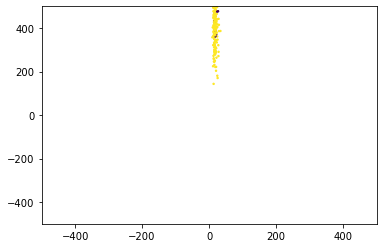

In [45]:
# Scaling 적용 전 시긱화
plt.xlim(-500, 500); plt.ylim(-500, 500)
plt.scatter(X_train[:,1], X_train[:,3], c=y_train, s=2)
plt.show()

In [46]:
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train, y_train).score(X_test, y_test)

0.9370629370629371

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train).score(X_test, y_test)

0.9370629370629371

#### Standardization

In [48]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc1 = scaler.fit_transform(X_train)
X_test_sc1 = scaler.transform(X_test) # Scaling training and test data the same way

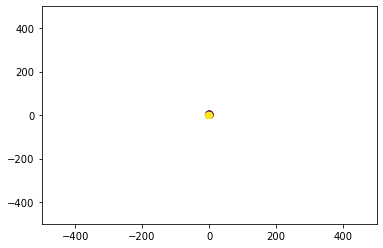

In [49]:
# Standardization 적용 후 시긱화
plt.xlim(-500, 500); plt.ylim(-500, 500)
plt.scatter(X_train_sc1[:,1], X_train_sc1[:,3], c=y_train)
plt.show()

In [50]:
svm.fit(X_train_sc1, y_train).score(X_test_sc1, y_test)

0.965034965034965

In [51]:
# Decision Tree를 기반으로 하는 모델은 Scaing에 거의 영향을 받지 않는다.
dt.fit(X_train_sc1, y_train).score(X_test_sc1, y_test)

0.9370629370629371

#### Min-max scaling

In [52]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc2 = scaler.fit(X_train).transform(X_train)
X_test_sc2 = scaler.transform(X_test) 

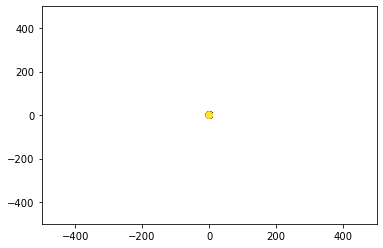

In [53]:
# Min-max scaling 적용 후 시긱화
plt.xlim(-500, 500); plt.ylim(-500, 500)
plt.scatter(X_train_sc2[:,1], X_train_sc2[:,3], c=y_train)
plt.show()

In [54]:
svm.fit(X_train_sc2, y_train).score(X_test_sc2, y_test)

0.972027972027972

<font color='blue'><p>
Feature Scaling에 대해 더 많은 내용을 알고 싶으면 아래 자료를 참조:  
- [All about Feature Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

### Feature Transformation

#### Power Transformation

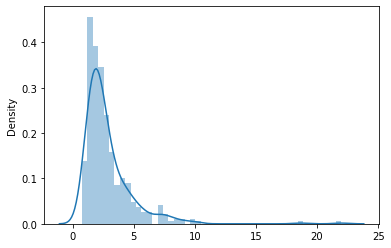

In [55]:
import seaborn as sns

sns.distplot(pd.DataFrame(X_train[:,12]))
plt.show()

In [56]:
# making data more Gaussian-like
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(standardize=True)
X_train_sc3 = scaler.fit(X_train).transform(X_train)
X_test_sc3 = scaler.transform(X_test) 

# 정규화와 스케일링 동시에 : powertransformer

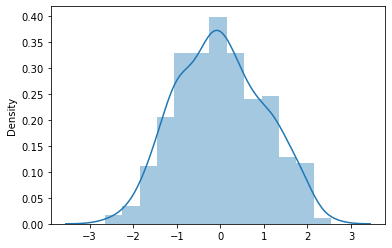

In [57]:
sns.distplot(pd.DataFrame(X_train_sc3[:,12]))
plt.show()

In [58]:
svm.fit(X_train_sc3, y_train).score(X_test_sc3, y_test)

0.986013986013986

###  Binning

- 구간분할(Binning 또는 Discretization)은 수치형 feature를 구간별로 나누어 범주형 feature로 변환하는 방법
- 결과가 순서가 있는 범주형 feature가 되므로 순서 그대로를 수치화 하거나 OHE를 적용할 수도 있음
- 이상치 완화, 결측값처리 용이, 과적합 완화, 결과에 대한 해석 용이 등의 장점이 있으나 근본적으로는 정보손실을 초래할 수 있음.
- 연속형 변수일때 일정 구간을 정해서 범주형으로 조져버림 -> 정규분포 형태로 조질수있음

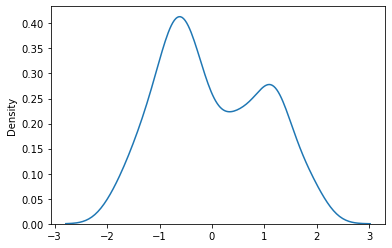

In [59]:
sns.kdeplot(X_train_sc3[:,7])
plt.show()

In [63]:
from sklearn.preprocessing import KBinsDiscretizer

bin_cols = [7]

X_train_sc3_bin = X_train_sc3.copy()
X_test_sc3_bin = X_test_sc3.copy()

### K-bins discretization
# - encode: 'onehot', 'onehot-dense', 'ordinal'
# - strategy: 'uniform', 'quantile' , 'kmeans'

# 순서 그대로를 수치화
bin = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_sc3_bin[:,bin_cols] = bin.fit_transform(X_train_sc3[:,bin_cols])
X_test_sc3_bin[:,bin_cols] = bin.transform(X_test_sc3[:,bin_cols])

bin.bin_edges_

array([array([-1.89375698, -1.08996257, -0.28616817,  0.51762624,  1.32142065,
               2.12521506])                                                   ],
      dtype=object)

In [64]:
X_train_sc3_bin = X_train_sc3.copy()
X_test_sc3_bin = X_test_sc3.copy()

# OHE 적용
bin = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
X_train_sc3_bin = np.c_[np.delete(X_train_sc3,bin_cols,axis=1), bin.fit_transform(X_train_sc3[:,bin_cols])]
X_test_sc3_bin = np.c_[np.delete(X_test_sc3,bin_cols,axis=1), bin.transform(X_test_sc3[:,bin_cols])]

X_train_sc3_bin.shape, X_train_sc3.shape

((426, 34), (426, 30))

In [65]:
svm.fit(X_train_sc3_bin, y_train).score(X_test_sc3_bin, y_test)

0.986013986013986

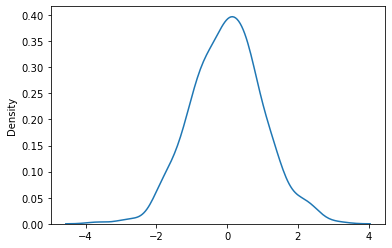

In [66]:
sns.kdeplot(X_train_sc3_bin[:,7])
plt.show()

## 4. Feature Selection ###

### Model based feature selection #####
- 피처에 비해 샘플이 충분히 많으면 피처셀렉션 조지지마
- 컴피티션은 샘플에 비해 피처가 많다... 셀렉션 조질것

In [67]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# 트리기반 모델

select1 = SelectFromModel(RandomForestClassifier(random_state=0), threshold=None)


In [68]:
X_train_sc3_fs1 = select1.fit(X_train_sc3, y_train).transform(X_train_sc3)
X_test_sc3_fs1 = select1.transform(X_test_sc3)
# 트리계열에서 중요한 루트만 뽑아냄

print("X_train_sc3.shape: {}, X_train_sc3_fs1.shape: {}".format(X_train_sc3.shape, X_train_sc3_fs1.shape))

X_train_sc3.shape: (426, 30), X_train_sc3_fs1.shape: (426, 10)


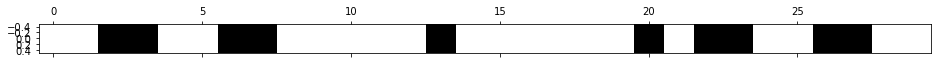

In [69]:
mask = select1.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

# 까만것만 중요하다 생각해서 뽑아낸 것들
# 경험상 별로 좋지 않다~
# 인포메이션 로스의 발생가능성 올라간다

In [70]:
svm.fit(X_train_sc3_fs1, y_train).score(X_test_sc3_fs1, y_test)

0.9370629370629371

### Univariate feature selection

In [71]:
from sklearn.feature_selection import SelectKBest
# y에 영향을 가장 많이 미칠수있는 것을 k개만 골라라
# 10가 맞는지 20개가 맞는지...? 모른다

select2 = SelectKBest(k=10)
X_train_sc3_fs2 = select2.fit_transform(X_train_sc3, y_train)
X_test_sc3_fs2 = select2.transform(X_test_sc3)

X_train_sc3_fs2.shape

(426, 10)

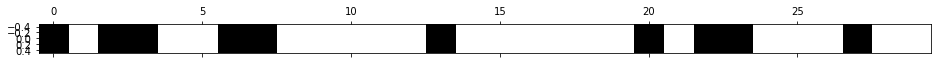

In [72]:
mask = select2.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

In [73]:
svm.fit(X_train_sc3_fs2, y_train).score(X_test_sc3_fs2, y_test)

0.951048951048951

  0%|          | 0/95 [00:00<?, ?it/s]

(90, 0.983568075117371)


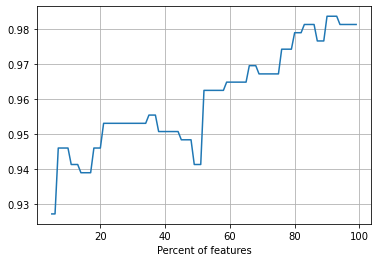

(426, 27)


In [74]:
# 최적점: 학습 데이터에 대한 최적점 -> 오버피팅
# Univariate feature selection을 통해 자동으로 feature를 선택하는 방법 예시 (단, 과적합 주의)
# 데이터가 크면 시간이 너무걸림
# 데이터가 충분해야 좋다

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import cross_val_score
from tqdm import tqdm_notebook

# 사용할 모델 설정 (성능이 떨어지지 않으면서 가능한 속도가 빠른 모델 사용 권장)
model = LogisticRegression(random_state=0)

# SelectPercentile()의 p(feature의 비율)값을 변화시키면서 최적의 p를 결정
cv_scores = []
for p in tqdm_notebook(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train_sc3, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, cv=3).mean()
    cv_scores.append((p, cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()
plt.show()

# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_sc3, y_train)
X_train_sc3_fs2p = fs.transform(X_train_sc3)
X_test_sc3_fs2p = fs.transform(X_test_sc3)

print(X_train_sc3_fs2p.shape)

In [75]:
svm.fit(X_train_sc3_fs2p, y_train).score(X_test_sc3_fs2p, y_test)

0.972027972027972

### Recursive feature elimination

In [76]:
from sklearn.feature_selection import RFE
#데이터가 많으면 못돌린다

select3 = RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=10, step=1)
X_train_sc3_fs3 = select3.fit_transform(X_train_sc3, y_train)
X_test_sc3_fs3 = select3.transform(X_test_sc3)

X_train_sc3_fs3.shape

(426, 10)

In [77]:
svm.fit(X_train_sc3_fs3, y_train).score(X_test_sc3_fs3, y_test)

0.972027972027972

### Feature selection using SHAP(SHapley Additive exPlanations)

In [78]:
!pip install shap

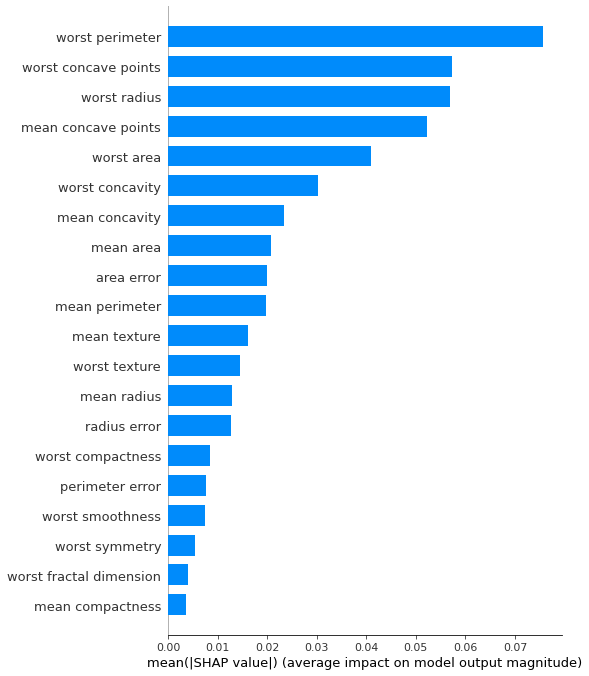

,feature_name,shap_importance
22,worst perimeter,0.075618
27,worst concave points,0.057271
20,worst radius,0.056786
7,mean concave points,0.052158
23,worst area,0.041022
26,worst concavity,0.030308
6,mean concavity,0.023455
3,mean area,0.020757
13,area error,0.019991
2,mean perimeter,0.019761


In [79]:
import shap

# Data, based on which importance is checked
model = RandomForestClassifier(random_state=0).fit(X_train_sc3, y_train)
X_importance = X_test_sc3

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values[1], X_importance, feature_names=cancer.feature_names, plot_type='bar')

# Disply feature importance in a table
shap_sum = np.abs(shap_values).mean(axis=1)
importance_df = pd.DataFrame([cancer.feature_names, shap_sum[1]]).T
importance_df.columns = ['feature_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

In [80]:
features_selected = importance_df.iloc[:29].index
#features_selected = importance_df.query('shap_importance > 0').index
X_train_sc3_fs4 = X_train_sc3[:,features_selected]
X_test_sc3_fs4 =X_test_sc3[:,features_selected]

X_train_sc3_fs4.shape

(426, 29)

In [81]:
svm.fit(X_train_sc3_fs4, y_train).score(X_test_sc3_fs4, y_test)

0.993006993006993

## 5. Dimensionality Reduction

### PCA(Principal Component Analysis, 주성분분석)
원 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환하는 기법  
<img align="left" src="https://miro.medium.com/max/1400/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg" width=600 height=400>
<img align="left" src="https://t1.daumcdn.net/cfile/tistory/232FCB42527C51481B" width=600 height=400>

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_sc3)
X_test_pca = pca.transform(X_test_sc3)

print(X_train_pca.shape)
svm.fit(X_train_pca, y_train).score(X_test_pca, y_test)

(426, 10)


0.9790209790209791

<BarContainer object of 10 artists>

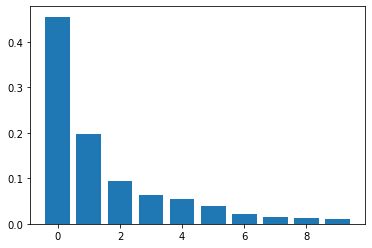

In [83]:
# 각 주성분에 의해 설명되는 분산의 비율
# 몇차원으로 줄여야해?
# pca를 하면할수록 인포메이션 로스가커진다
# 1. 뉴메릭 피처가 다닥다닥 붙어있는데서는 쓰면안됨 -> 값이 빽빽하게 채워진 피처는 피씨에이 금지
# 2. 원핫인코딩을 한 다음에 피처들을 피씨에이 돌려라 -> 피씨에이 돌려서 피처를 줄임

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

In [84]:
# 적절한 주성분의 갯수를 결정하는 방법 중 하나
max_d = num_d = X_train.shape[1]
pca = PCA(n_components=max_d).fit(X_train_sc3)
cumsum = np.cumsum(pca.explained_variance_ratio_) #분산의 설명량을 누적합
num_d = np.argmax(cumsum >= 0.99) + 1             #분산의 설명량이 99%이상 되는 차원의 수
if num_d == 1: num_d = max_d
pca = PCA(n_components=num_d, random_state=0)  
X_train_pca = pca.fit_transform(X_train_sc3)
X_test_pca = pca.transform(X_test_sc3)

print(X_train_pca.shape)
svm.fit(X_train_pca, y_train).score(X_test_pca, y_test)

(426, 15)


0.986013986013986

## 6. Feature Generation ###
- 그룹별 summary: Ex) state는 고객이 위치한 36개 주를 나타냄 => 주별로 평균 cost를 계산하여 새로운 feature 생성
- 기존 feature 간의 결합: Ex) 1인당 견적을 계산
- 개별 feature 의 함수적 변환: Ex) np.log, np.sqrt, np.square 등을 사용
- 상호작용과 다항식 추가: 아래 참조

### Automatic generating polynomial and interaction features
입력값  x 를 다항식으로 변환한다.
$$ x →[1,x,x^2,x^3,⋯] $$

만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.
$$ [x_1,x_2]→[1,x_1,x_2,x_1^2,x_1x_2,x_2^2] $$

다음과 같은 파라미터를 가진다.
- degree : 차수
- interaction_only: <font color="#CC3D3D">서로 다른 피처들 간의 곱만 생성할지 여부<p>
- include_bias : 상수항 생성 여부

In [85]:
# 이전에 배우고 실행했던 코드
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 
scaler = PowerTransformer(standardize=True)
X_train_sc3 = scaler.fit(X_train).transform(X_train)
X_test_sc3 = scaler.transform(X_test) 
svm = SVC(random_state=0)

In [86]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(1,7).reshape(3, 2); X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [87]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

In [88]:
# 코드 추가
df = pd.DataFrame(poly.fit_transform(X)); df.columns=poly.get_feature_names()
df

,1,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0
1,1.0,3.0,4.0,9.0,12.0,16.0,27.0,36.0,48.0,64.0
2,1.0,5.0,6.0,25.0,30.0,36.0,125.0,150.0,180.0,216.0


In [89]:
# 코드 변경
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit_transform(X)

array([[ 1.,  2.,  2.],
       [ 3.,  4., 12.],
       [ 5.,  6., 30.]])

In [90]:
poly.get_feature_names()

['x0', 'x1', 'x0 x1']

In [91]:
# 코드 수정
print(X_train_sc3.shape)

poly = PolynomialFeatures(2, include_bias=False)
X_train_sc3_poly = poly.fit_transform(X_train_sc3)
X_test_sc3_poly = poly.transform(X_test_sc3)
print(X_train_sc3_poly.shape, X_test_sc3_poly.shape)

svm.fit(X_train_sc3_poly, y_train).score(X_test_sc3_poly, y_test)

(426, 30)
(426, 495) (143, 495)


0.9370629370629371

#### feature generation + feature selection

In [92]:
select2 = SelectKBest(k=20)
X_train_sc3_poly_fs2 = select2.fit(X_train_sc3_poly, y_train).transform(X_train_sc3_poly)
X_test_sc3_poly_fs2 = select2.transform(X_test_sc3_poly)
print(X_train_sc3_poly_fs2.shape)

svm.fit(X_train_sc3_poly_fs2, y_train).score(X_test_sc3_poly_fs2, y_test)

(426, 20)


0.993006993006993

In [93]:
mask = select2.get_support()
np.array(poly.get_feature_names())[mask]

array(['x0', 'x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x10', 'x12', 'x13',
       'x17', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27',
       'x3 x10'], dtype='<U7')

## Etc.

<font color='blue'><p>
#### Kaggle Competition에서 자주 사용되는 feature 생성방법(아래 pdf 참조)
<font color='black'><p>    
- https://drive.google.com/open?id=1HDZc1mDvtmpjg9YPpUN0koHeAiqTAHRw

<font color='blue'><p>      
#### Automated Feature Engineering
<font color='black'><p>    
- Feature Engineering의 자동화는 머신러닝 분야에서 급부상 하고 있는 연구주제
- MIT는 Deep Feature Synthesis라는 알고리즘을 발표 (2015)
    - 온라인 데이터 과학 대회에서 906개 참가팀 중 615개 팀을 이김으로써 그 효과를 입증 
    - [Featuretools](https://www.featuretools.com/)라는 오픈 소스 라이브러리로 제공

<font color="#CC3D3D"><p>
# End